In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter
from sklearn import metrics
from scipy.spatial.distance import cdist 
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold,cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10,8)
df = pd.read_csv("data.csv")

# Data  Cleaning

In [72]:
plt.rcParams['figure.figsize'] = (10,8)
df = pd.read_csv("data.csv")

print(df.head())

print(df.shape)

        title                               artist  weeks  rank  popularity  \
0  God's Plan                                Drake      3     1         100   
1     Perfect                           Ed Sheeran     24     2          97   
2     Finesse                 Bruno Mars & Cardi B      6     3          98   
3      Havana  Camila Cabello Featuring Young Thug     26     4          98   
4    Rockstar      Post Malone Featuring 21 Savage     21     5          74   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.753   0.454    7    -9.488     1       0.0963        0.0244   
1         0.599   0.448    8    -6.312     1       0.0232        0.1630   
2         0.704   0.859    5    -4.877     0       0.0996        0.0185   
3         0.765   0.523    2    -4.333     1       0.0300        0.1840   
4         0.664   0.585    7    -6.029     0       0.1540        0.1890   

   instrumentalness  liveness  valence    tempo speech        date  
0    

In [73]:
df.describe()

weeks           rank     popularity   danceability  \
count  100066.000000  100066.000000  100066.000000  100066.000000   
mean       11.671527      50.486619      64.393011       0.635076   
std         9.115330      28.867288      14.497977       0.143422   
min         1.000000       1.000000       0.000000       0.000000   
25%         5.000000      25.000000      57.000000       0.538000   
50%        10.000000      50.000000      66.000000       0.639000   
75%        16.000000      75.000000      74.000000       0.735000   
max        87.000000     100.000000     100.000000       0.981000   

              energy            key       loudness           mode  \
count  100066.000000  100066.000000  100066.000000  100066.000000   
mean        0.677168       5.221324      -6.156803       0.672896   
std         0.174677       3.613481       2.561298       0.469158   
min         0.000020       0.000000     -39.122000       0.000000   
25%         0.564000       2.000000      -7.249000       0.000000   
50%         0.699000       5.000000      -5.694000       1.000000   
75%         0.810000       8.000000      -4.457000       1.000000   
max         0.998000      11.000000       1.258000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  100066.000000  100066.000000     100066.000000  100066.000000   
mean        0.097348       0.176618          0.014021       0.178318   
std         0.099073       0.214555          0.089387       0.137831   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035700       0.022300          0.000000       0.093900   
50%         0.052900       0.084700          0.000000       0.124000   
75%         0.115000       0.255000          0.000025       0.220000   
max         0.875000       0.996000          0.998000       0.987000   

             valence          tempo  
count  100066.000000  100066.000000  
mean        0.517685     120.605344  
std         0.225543      28.528997  
min         0.000000       0.000000  
25%         0.341000      97.549000  
50%         0.516000     119.981000  
75%         0.696000     139.986000  
max         0.980000     210.750000

In [74]:
df.duplicated().sum()

0

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100066 entries, 0 to 100065
Data columns (total 18 columns):
title               100066 non-null object
artist              100066 non-null object
weeks               100066 non-null int64
rank                100066 non-null int64
popularity          100066 non-null int64
danceability        100066 non-null float64
energy              100066 non-null float64
key                 100066 non-null int64
loudness            100066 non-null float64
mode                100066 non-null int64
speechiness         100066 non-null float64
acousticness        100066 non-null float64
instrumentalness    100066 non-null float64
liveness            100066 non-null float64
valence             100066 non-null float64
tempo               100066 non-null float64
speech              100066 non-null object
date                100066 non-null object
dtypes: float64(9), int64(5), object(4)
memory usage: 13.7+ MB


In [76]:
df_bak=df.copy()

In [77]:
#df_bak['date'] = pd.to_datetime(df_bak['date'])

In [78]:
#df_bak.set_index("date", inplace=True)

In [79]:
df_bak.info()
df_bak.axes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100066 entries, 0 to 100065
Data columns (total 18 columns):
title               100066 non-null object
artist              100066 non-null object
weeks               100066 non-null int64
rank                100066 non-null int64
popularity          100066 non-null int64
danceability        100066 non-null float64
energy              100066 non-null float64
key                 100066 non-null int64
loudness            100066 non-null float64
mode                100066 non-null int64
speechiness         100066 non-null float64
acousticness        100066 non-null float64
instrumentalness    100066 non-null float64
liveness            100066 non-null float64
valence             100066 non-null float64
tempo               100066 non-null float64
speech              100066 non-null object
date                100066 non-null object
dtypes: float64(9), int64(5), object(4)
memory usage: 13.7+ MB


[RangeIndex(start=0, stop=100066, step=1),
 Index(['title', 'artist', 'weeks', 'rank', 'popularity', 'danceability',
        'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'speech', 'date'],
       dtype='object')]

 ## Data Tidying

In [80]:
df_track = df_bak[['title','artist','popularity','danceability','energy','key','loudness','mode','speechiness','acousticness'
,'instrumentalness','liveness','valence','tempo']].drop_duplicates()
df_track.insert(0, 'id', range(1, len(df_track)+1))
df_track.head()
df_bak = pd.merge(df_bak, df_track, on = ['title', 'artist'])
df_bak = df_bak[['id', 'rank','date']]

In [81]:
df_track.to_csv('billboard-track.csv', index = False)
df_bak.to_csv('billborad-rank.csv', index = False)
print(df_track, '\n\n', df_bak)

          id                              title  \
0          1                         God's Plan   
1          2                            Perfect   
2          3                            Finesse   
3          4                             Havana   
4          5                           Rockstar   
5          6                          New Rules   
6          7                        Pray For Me   
7          8                           Stir Fry   
8          9                        Meant To Be   
9         10                        Bad At Love   
10        11                            Thunder   
11        12                       Let You Down   
12        13                              Love.   
13        14                         MotorSport   
14        15                            Him & I   
15        16                           No Limit   
16        17                      Say Something   
17        18                       I Fall Apart   
18        19         Bodak Yell

In [82]:
df_bak.head()

id  rank        date
0   1     1  2018-02-17
1   1     1  2018-02-10
2   1     1  2018-02-03
3   2     2  2018-02-17
4   2     2  2018-02-10

In [83]:
#df_bak = df_bak.set_index('id')

In [84]:
df_bak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100939 entries, 0 to 100938
Data columns (total 3 columns):
id      100939 non-null int32
rank    100939 non-null int64
date    100939 non-null object
dtypes: int32(1), int64(1), object(1)
memory usage: 2.7+ MB


In [85]:
c = df_bak.loc[df_bak['id'] == 101]['rank'].min()
print(c)

4


In [86]:
peak = []
for i in range(1, len(df_track)+1):
    tmp = []
    c = df_bak.loc[df_bak['id'] == i]['rank'].min()
    tmp.append(i)
    tmp.append(c)
    if c < 50:
        tmp.append("Yes")
    else:
        tmp.append("No")
    peak.append(tmp)
df_peak = pd.DataFrame(peak)
df_peak.columns = ['id', 'rank','hit']
df_peak.to_csv('billboard-peak.csv', index = False, header = ("id", "rank",'hit'))

In [87]:
df_peak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7281 entries, 0 to 7280
Data columns (total 3 columns):
id      7281 non-null int64
rank    7281 non-null int64
hit     7281 non-null object
dtypes: int64(2), object(1)
memory usage: 170.7+ KB


In [88]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7281 entries, 0 to 100063
Data columns (total 15 columns):
id                  7281 non-null int32
title               7281 non-null object
artist              7281 non-null object
popularity          7281 non-null int64
danceability        7281 non-null float64
energy              7281 non-null float64
key                 7281 non-null int64
loudness            7281 non-null float64
mode                7281 non-null int64
speechiness         7281 non-null float64
acousticness        7281 non-null float64
instrumentalness    7281 non-null float64
liveness            7281 non-null float64
valence             7281 non-null float64
tempo               7281 non-null float64
dtypes: float64(9), int32(1), int64(3), object(2)
memory usage: 881.7+ KB


In [89]:
df_full = pd.merge(df_peak, df_track, on = ['id'])

In [90]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7281 entries, 0 to 7280
Data columns (total 17 columns):
id                  7281 non-null int64
rank                7281 non-null int64
hit                 7281 non-null object
title               7281 non-null object
artist              7281 non-null object
popularity          7281 non-null int64
danceability        7281 non-null float64
energy              7281 non-null float64
key                 7281 non-null int64
loudness            7281 non-null float64
mode                7281 non-null int64
speechiness         7281 non-null float64
acousticness        7281 non-null float64
instrumentalness    7281 non-null float64
liveness            7281 non-null float64
valence             7281 non-null float64
tempo               7281 non-null float64
dtypes: float64(9), int64(5), object(3)
memory usage: 1023.9+ KB


In [91]:
df_full.head()

id  rank  hit       title                               artist  popularity  \
0   1     1  Yes  God's Plan                                Drake         100   
1   2     1  Yes     Perfect                           Ed Sheeran          97   
2   3     3  Yes     Finesse                 Bruno Mars & Cardi B          98   
3   4     1  Yes      Havana  Camila Cabello Featuring Young Thug          98   
4   5     1  Yes    Rockstar      Post Malone Featuring 21 Savage          74   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.753   0.454    7    -9.488     1       0.0963        0.0244   
1         0.599   0.448    8    -6.312     1       0.0232        0.1630   
2         0.704   0.859    5    -4.877     0       0.0996        0.0185   
3         0.765   0.523    2    -4.333     1       0.0300        0.1840   
4         0.664   0.585    7    -6.029     0       0.1540        0.1890   

   instrumentalness  liveness  valence    tempo  
0          0.000056    0.4980    0.344   77.170  
1          0.000000    0.1060    0.168   95.050  
2          0.000000    0.0215    0.926  105.115  
3          0.000036    0.1320    0.394  104.988  
4          0.000000    0.1320    0.199  159.888

In [92]:
df_full.describe()

id         rank   popularity  danceability       energy  \
count  7281.000000  7281.000000  7281.000000   7281.000000  7281.000000   
mean   3641.000000    47.770087    62.289795      0.626279     0.668788   
std    2101.987988    30.057009    15.368954      0.149140     0.187702   
min       1.000000     1.000000     0.000000      0.000000     0.000020   
25%    1821.000000    21.000000    54.000000      0.528000     0.552000   
50%    3641.000000    48.000000    64.000000      0.632000     0.696000   
75%    5461.000000    74.000000    73.000000      0.731000     0.812000   
max    7281.000000   100.000000   100.000000      0.981000     0.998000   

               key     loudness         mode  speechiness  acousticness  \
count  7281.000000  7281.000000  7281.000000  7281.000000   7281.000000   
mean      5.221261    -6.397185     0.672847     0.101020      0.190262   
std       3.602703     2.872308     0.469206     0.103386      0.232629   
min       0.000000   -39.122000     0.000000     0.000000      0.000000   
25%       2.000000    -7.559000     0.000000     0.035800      0.021900   
50%       5.000000    -5.832000     1.000000     0.053900      0.089900   
75%       8.000000    -4.526000     1.000000     0.121000      0.273000   
max      11.000000     1.258000     1.000000     0.875000      0.996000   

       instrumentalness     liveness      valence        tempo  
count       7281.000000  7281.000000  7281.000000  7281.000000  
mean           0.018772     0.182884     0.504577   120.938634  
std            0.105845     0.141859     0.228704    28.820194  
min            0.000000     0.000000     0.000000     0.000000  
25%            0.000000     0.094800     0.325000    97.660000  
50%            0.000000     0.126000     0.500000   120.014000  
75%            0.000034     0.233000     0.681000   140.018000  
max            0.998000     0.987000     0.980000   210.750000

In [93]:
df_full.to_csv('billboard-music-rank.csv', index = False)

In [94]:
df_full.isnull().sum()

id                  0
rank                0
hit                 0
title               0
artist              0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

## Distribution

In [95]:
df_data = df_full[['rank','popularity','danceability','energy','key','loudness','mode','speechiness','acousticness'
,'instrumentalness','liveness','valence','tempo']]
df_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7281 entries, 0 to 7280
Data columns (total 13 columns):
rank                7281 non-null int64
popularity          7281 non-null int64
danceability        7281 non-null float64
energy              7281 non-null float64
key                 7281 non-null int64
loudness            7281 non-null float64
mode                7281 non-null int64
speechiness         7281 non-null float64
acousticness        7281 non-null float64
instrumentalness    7281 non-null float64
liveness            7281 non-null float64
valence             7281 non-null float64
tempo               7281 non-null float64
dtypes: float64(9), int64(4)
memory usage: 796.4 KB


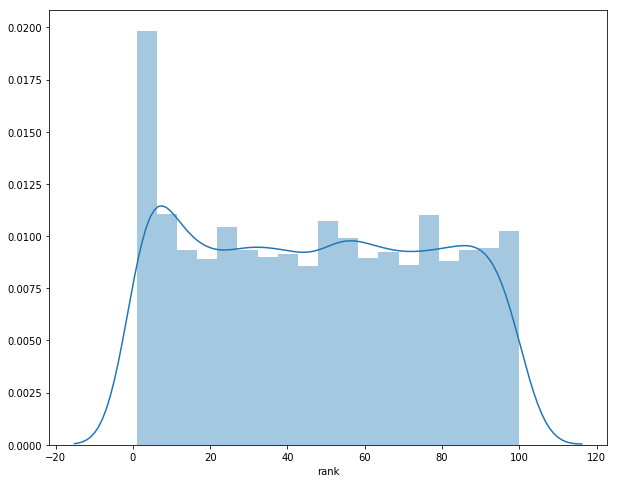

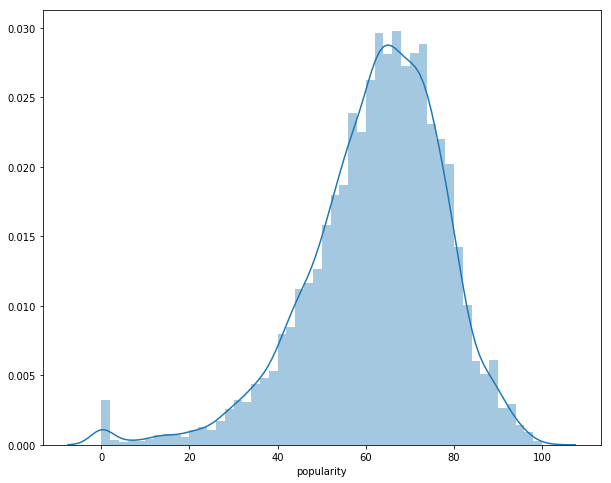

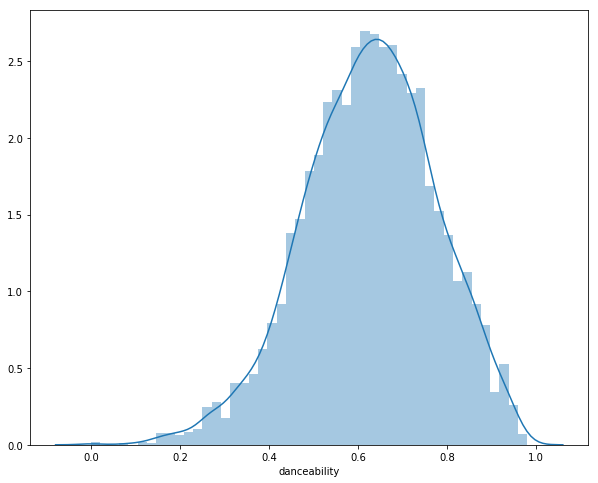

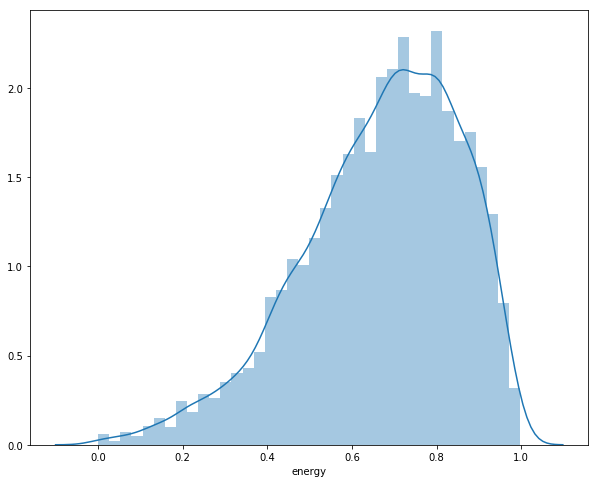

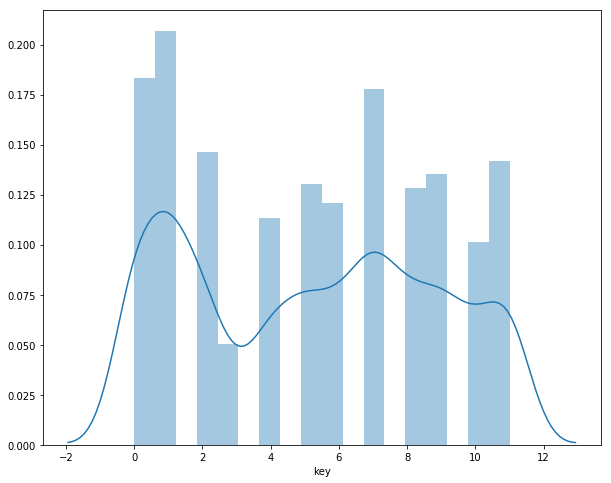

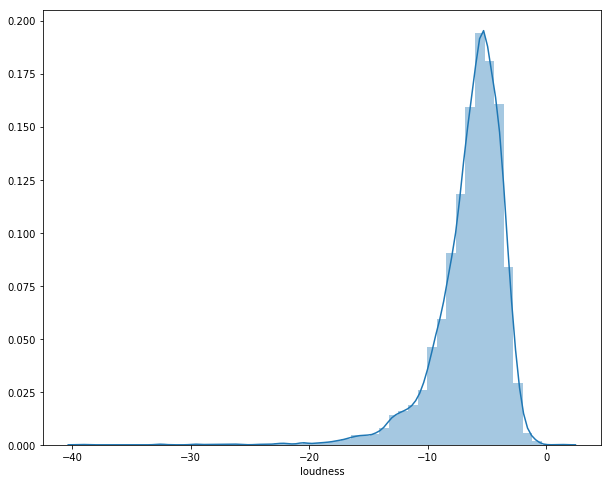

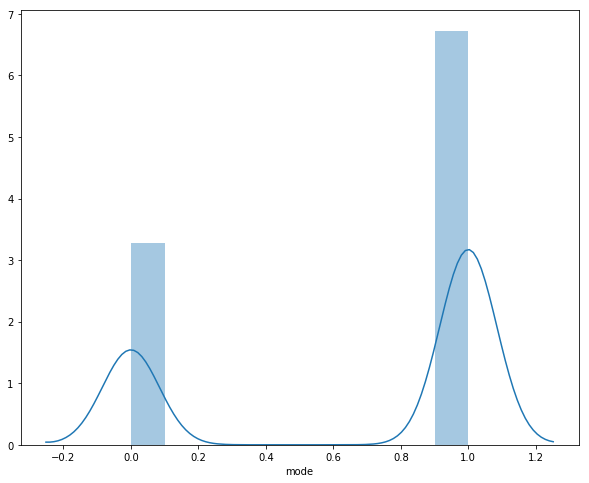

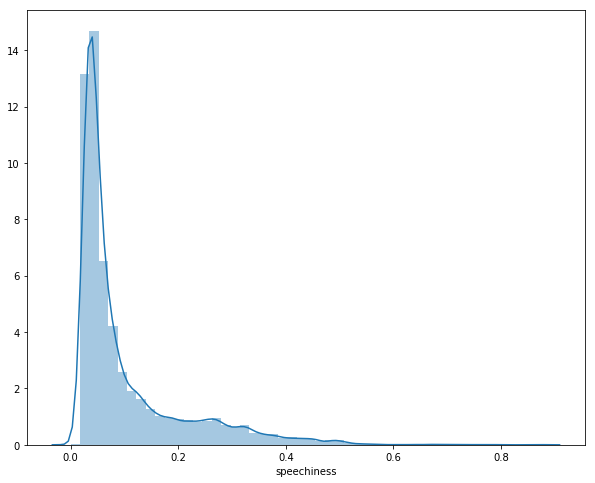

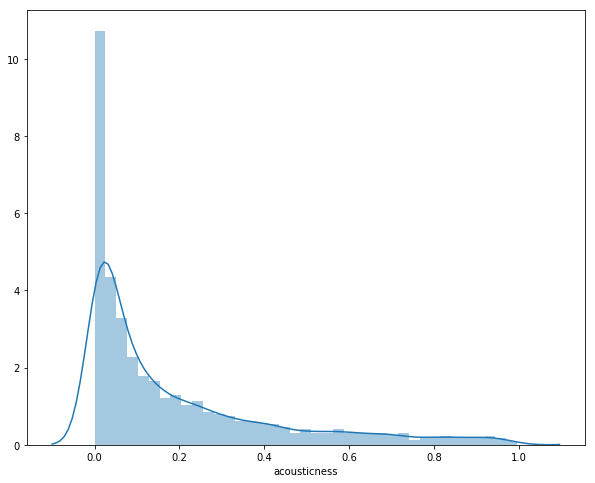

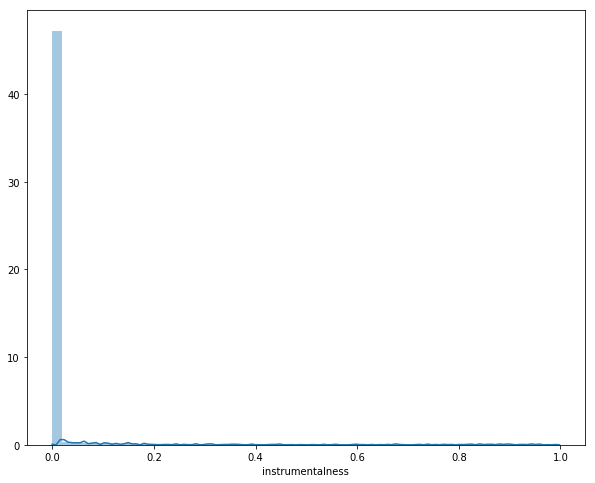

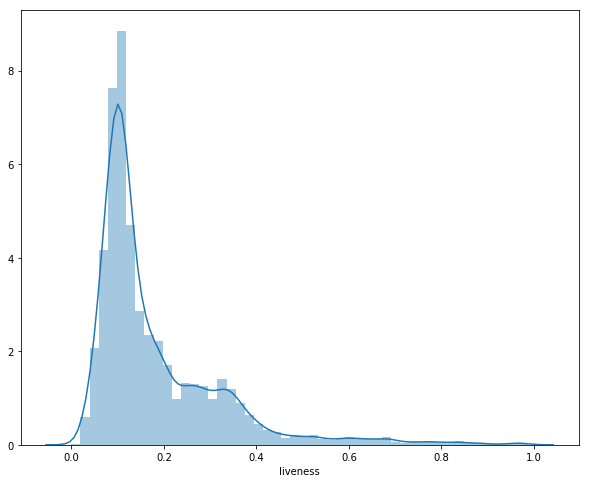

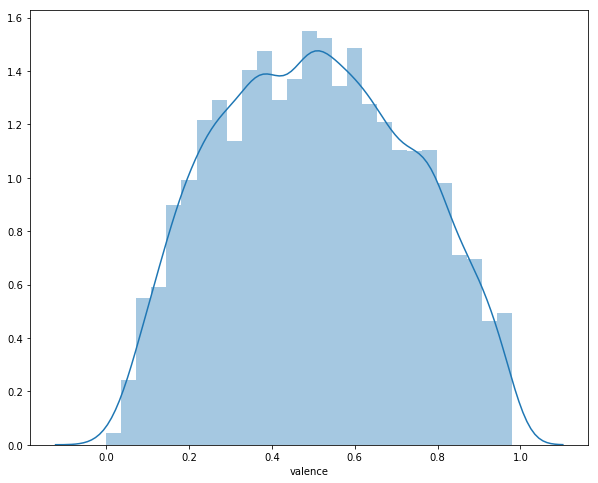

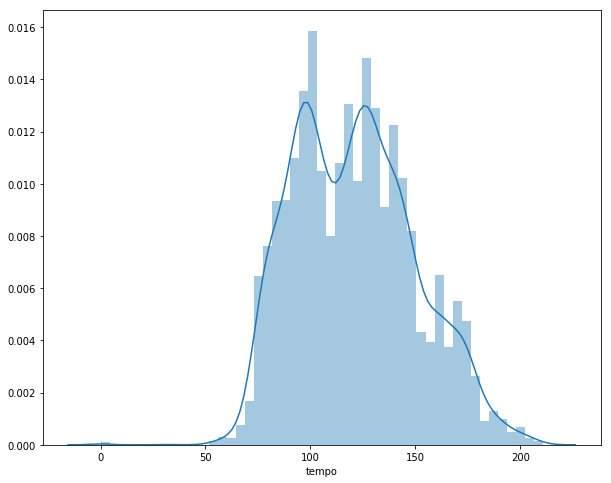

In [96]:
def show_distribution(df):
    for col in list(df.columns.values):
        sns.distplot(df[col])
        plt.show()
        
show_distribution(df_data)


In [97]:
data = df_data
data_zs = preprocessing.normalize(data, norm='l2')
data_zs = pd.DataFrame(data_zs)
data_zs.columns=list(data.columns)
r = df_full['hit']
data_hit = pd.concat([data_zs,r],axis = 1)
data_hit.columns = list(data_zs.columns)+["hit"]
data_hit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7281 entries, 0 to 7280
Data columns (total 14 columns):
rank                7281 non-null float64
popularity          7281 non-null float64
danceability        7281 non-null float64
energy              7281 non-null float64
key                 7281 non-null float64
loudness            7281 non-null float64
mode                7281 non-null float64
speechiness         7281 non-null float64
acousticness        7281 non-null float64
instrumentalness    7281 non-null float64
liveness            7281 non-null float64
valence             7281 non-null float64
tempo               7281 non-null float64
hit                 7281 non-null object
dtypes: float64(13), object(1)
memory usage: 796.4+ KB


In [98]:
data_hit['hit'].value_counts()

Yes    3750
No     3531
Name: hit, dtype: int64

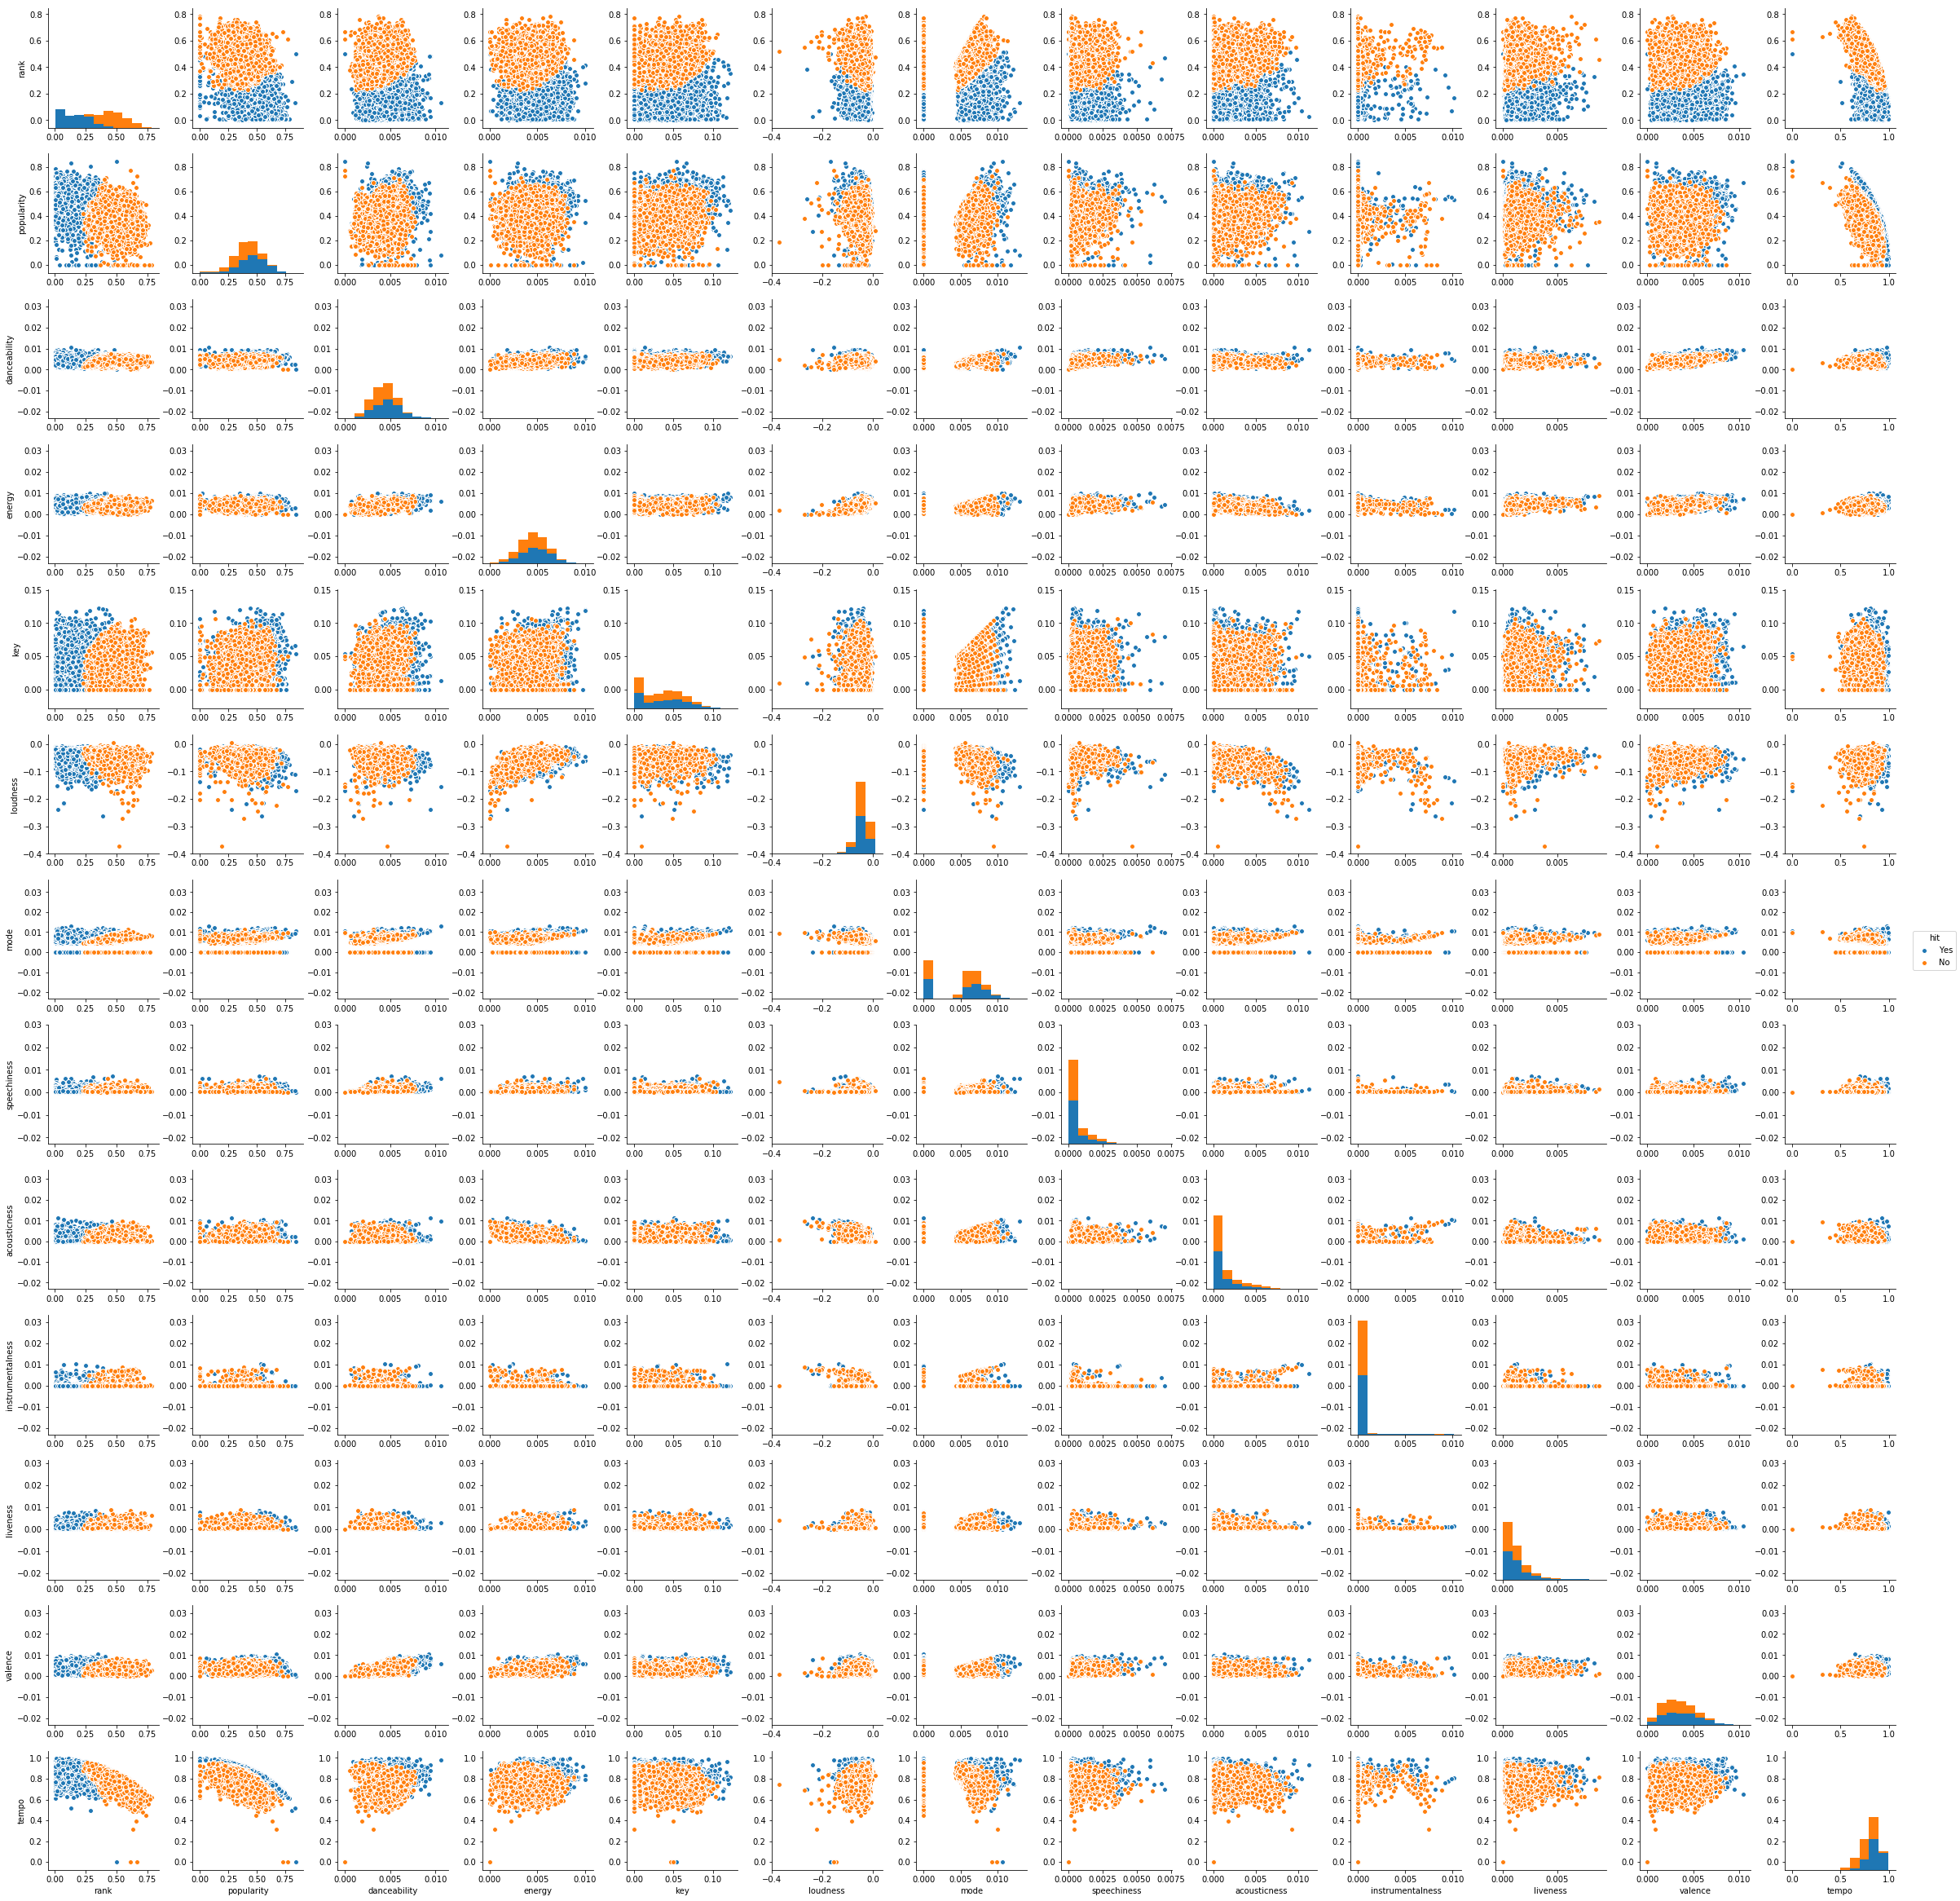

In [99]:
sns.pairplot(data_hit, hue = 'hit')

## Elbow method to determine the K value

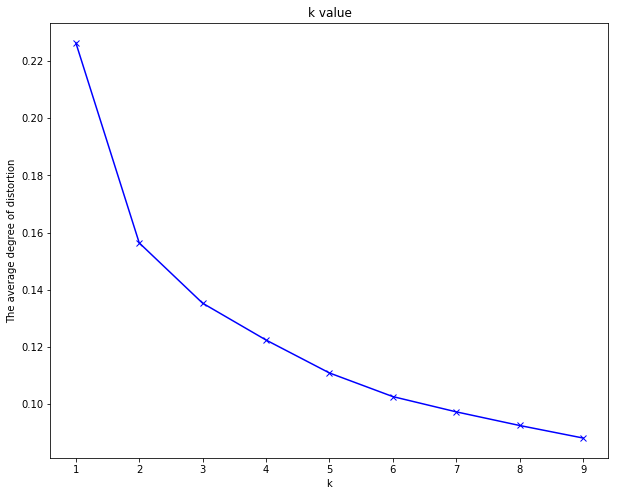

In [100]:
K = range(1, 10)  
meandistortions = [] 
for k in K:  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(data_zs)  
    meandistortions.append(sum(np.min(cdist(data_zs, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data_zs.shape[0])
plt.plot(K, meandistortions, 'bx-')  
plt.xlabel('k')  
plt.ylabel('The average degree of distortion')  
plt.title('k value'); 

## KMeans 
### k =2

In [101]:
model = KMeans(n_clusters = 2, n_jobs = 4,max_iter=500)
model.fit(data_zs)
labels = model.labels_
print(metrics.calinski_harabaz_score(data_zs,labels) )
print(metrics.silhouette_score(data_zs,labels,metric='euclidean'))

7517.30828641
0.433963691971


In [102]:
r1 = pd.Series(model.labels_).value_counts()
r2 = pd.DataFrame(model.cluster_centers_)
r = pd.concat([r2,r1],axis = 1)
r.columns = list(data_zs.columns)+["num"]
print(r)

       rank  popularity  danceability    energy       key  loudness      mode  \
0  0.153193    0.462972      0.004536  0.004807  0.037282 -0.044016  0.004755   
1  0.484707    0.392630      0.004179  0.004411  0.034989 -0.045296  0.004584   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
0     0.000711      0.001254          0.000103  0.001278  0.003694  0.854723   
1     0.000679      0.001441          0.000164  0.001249  0.003318  0.758740   

    num  
0  3664  
1  3617  


Counter({0: 3664, 1: 3617})

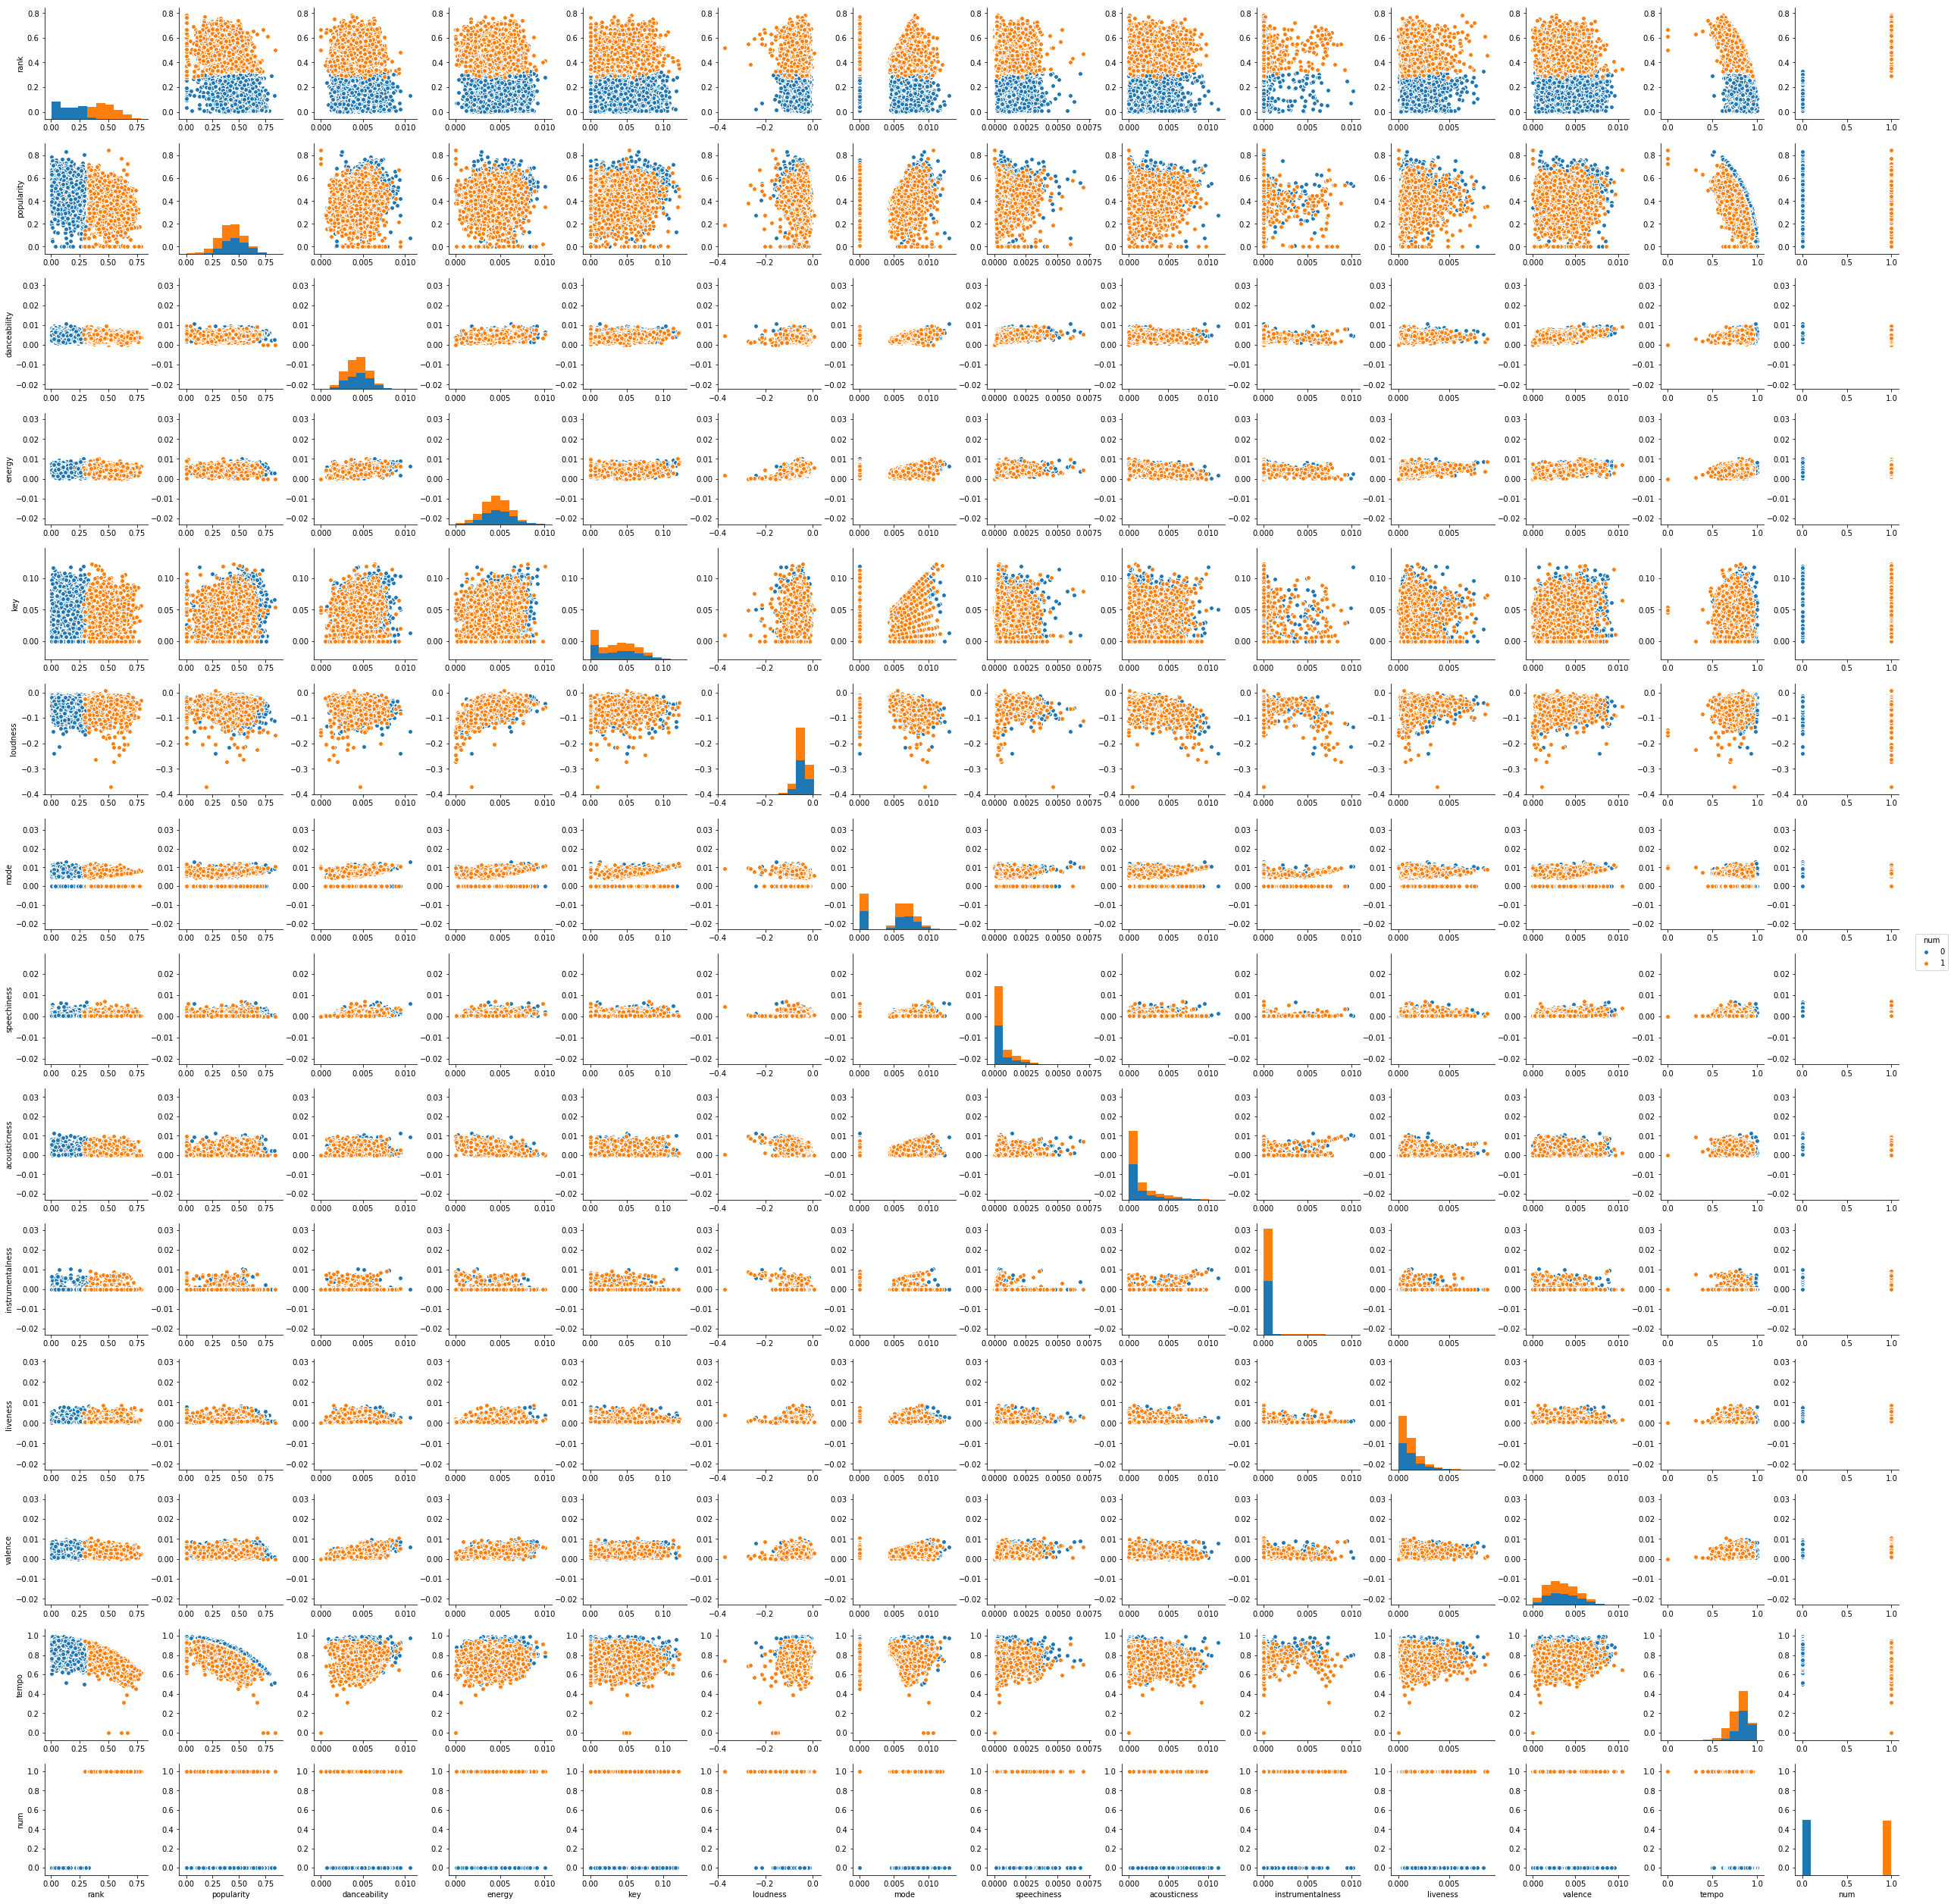

In [103]:
r = pd.concat([data_zs,pd.Series(model.labels_,index=data_zs.index)],axis=1)
r.columns=list(data_zs.columns)+["num"]
sns.pairplot(r,hue="num")
Counter(r['num'])

## DBSCAN

In [104]:
db = DBSCAN(eps=0.04, min_samples=10).fit(data_zs)
labels = db.labels_
print(Counter(labels))

Counter({0: 6750, -1: 522, 1: 9})


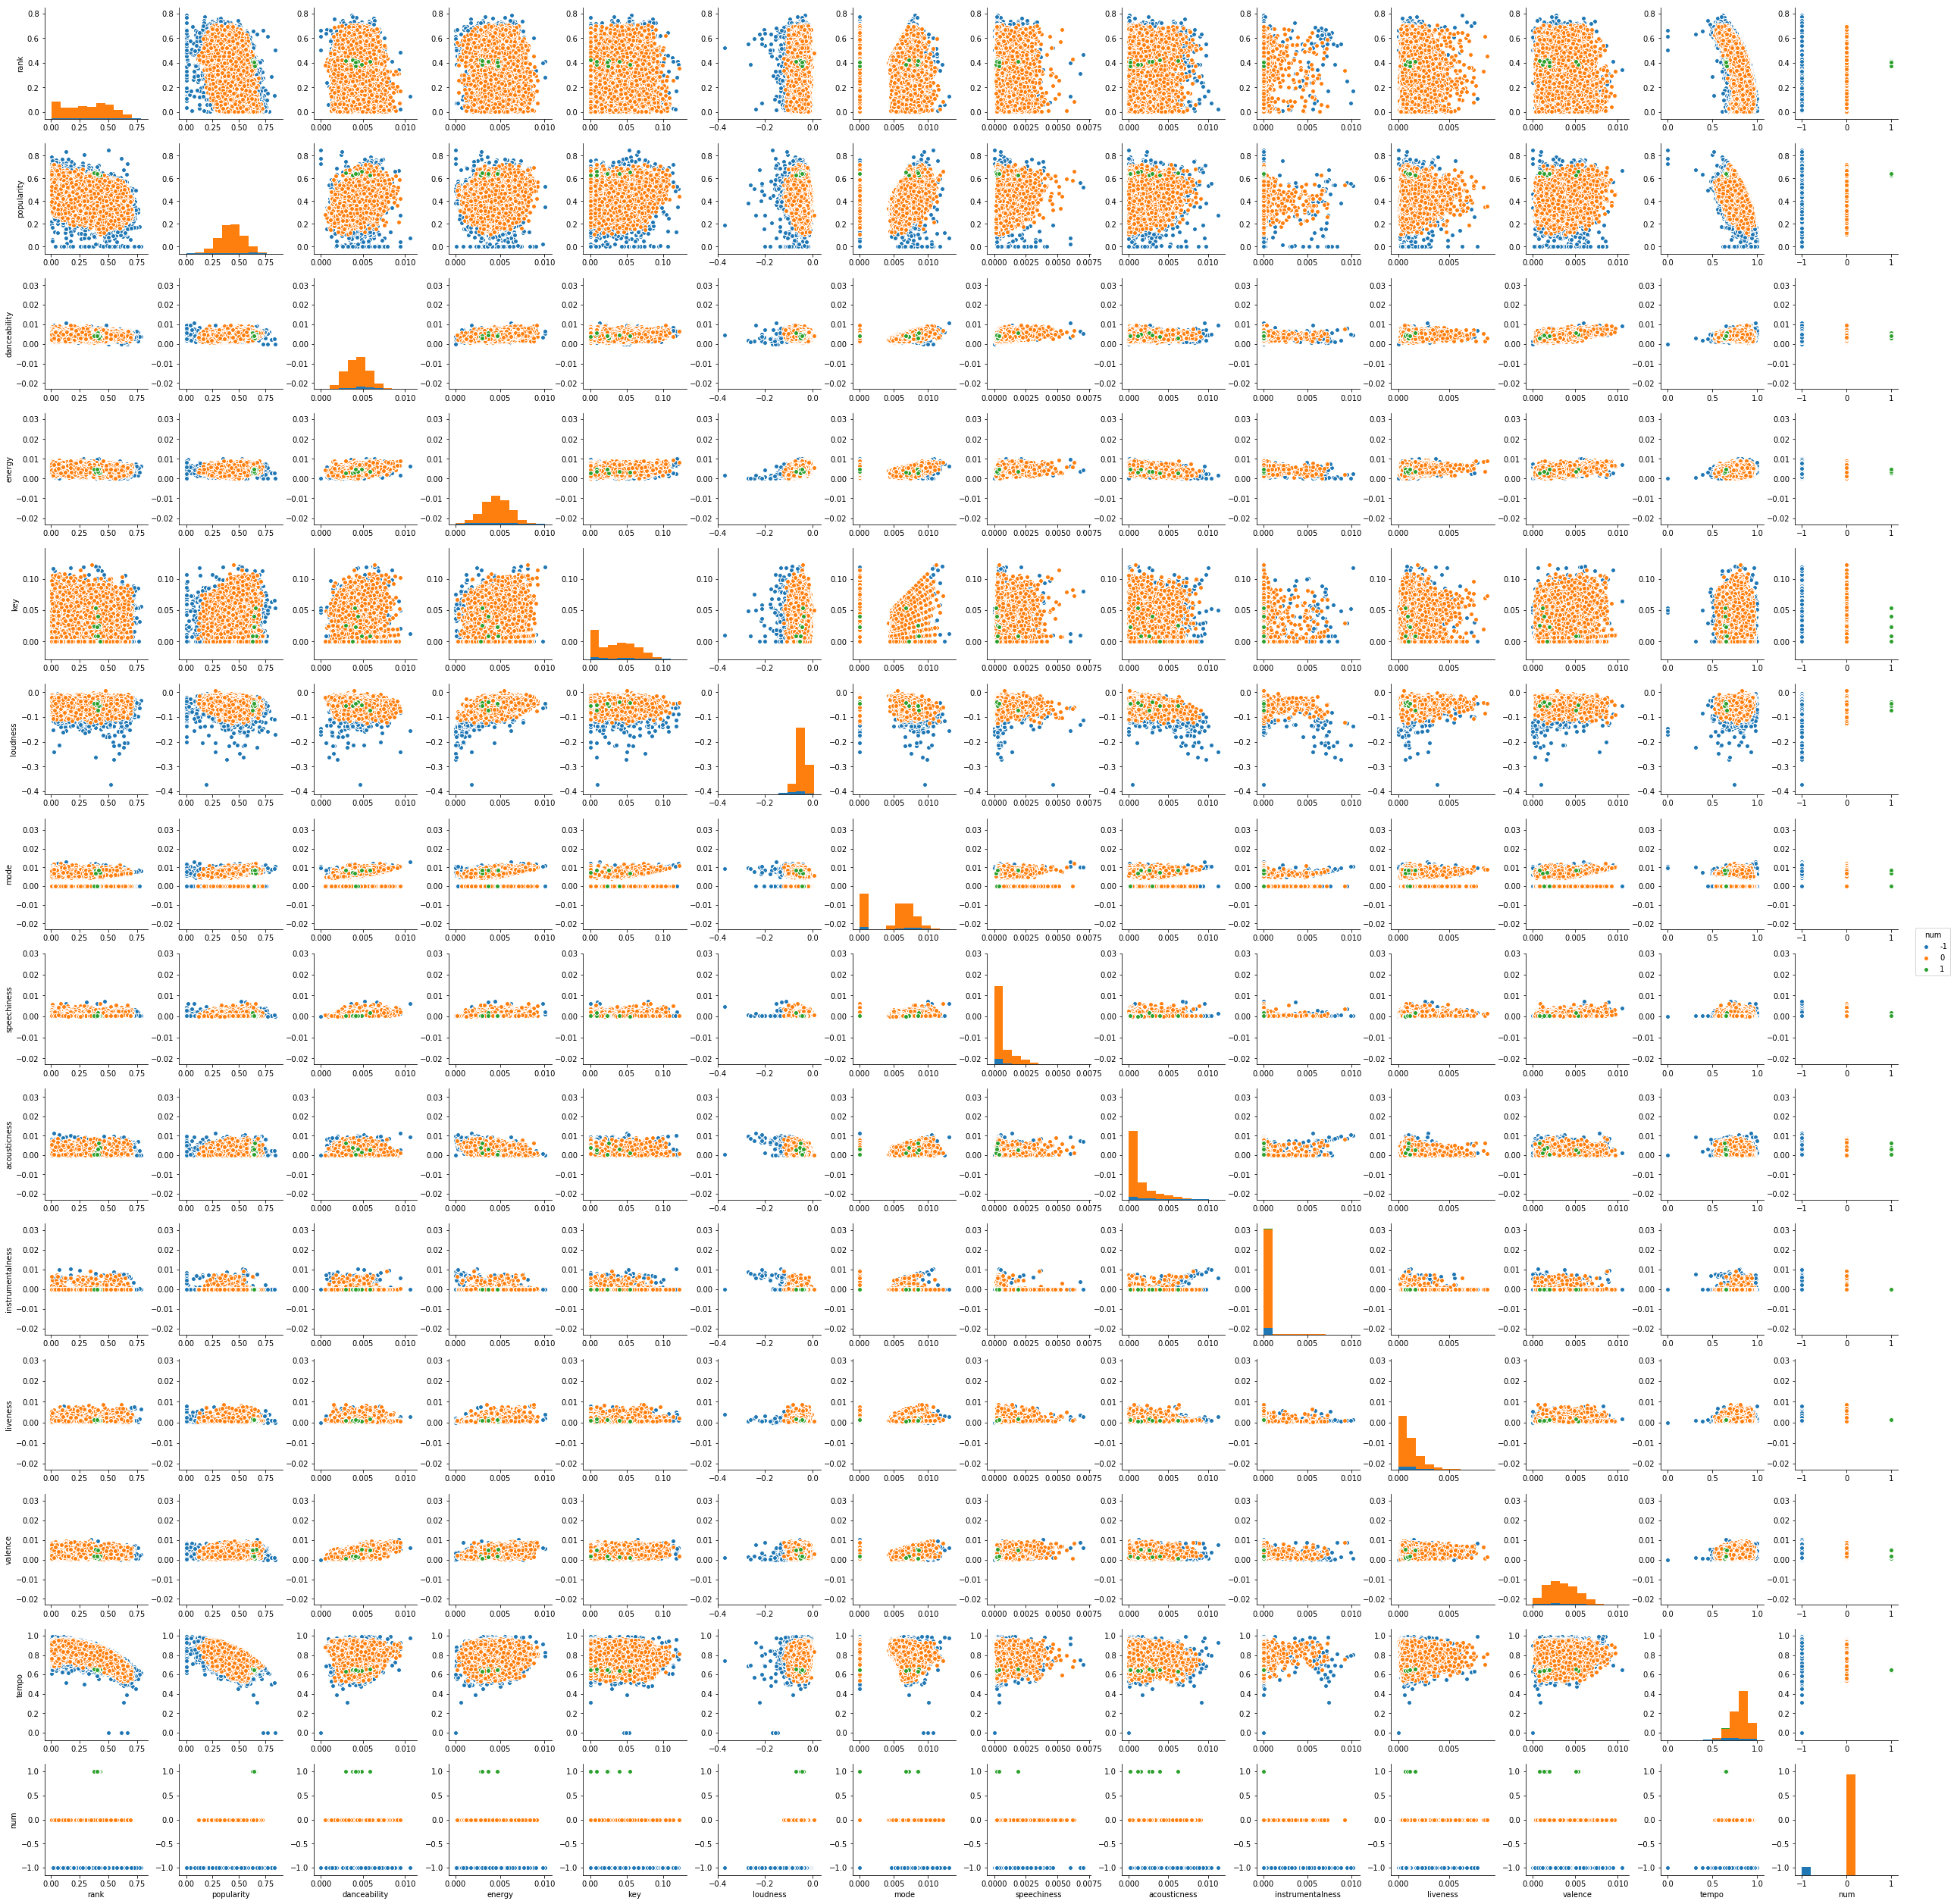

In [105]:
r = pd.concat([data_zs,pd.Series(labels,index=data_zs.index)],axis=1)
r.columns=list(data_zs.columns)+["num"]
sns.pairplot(r,hue="num")

# Linear Model

In [106]:
data_zs.corr()

rank  popularity  danceability    energy       key  \
rank              1.000000   -0.315148     -0.133345 -0.127756 -0.029245   
popularity       -0.315148    1.000000      0.324095  0.152248  0.114761   
danceability     -0.133345    0.324095      1.000000  0.347981  0.142452   
energy           -0.127756    0.152248      0.347981  1.000000  0.130613   
key              -0.029245    0.114761      0.142452  0.130613  1.000000   
loudness         -0.058594   -0.150355     -0.174223  0.393442 -0.072323   
mode             -0.008860    0.058364      0.066894  0.075445 -0.058991   
speechiness      -0.012862    0.051677      0.278156  0.109918  0.059613   
acousticness      0.075742    0.101300     -0.000211 -0.400886  0.039666   
instrumentalness  0.060047   -0.076475     -0.043489 -0.103984 -0.002563   
liveness         -0.000704    0.040255      0.066596  0.250276  0.045088   
valence          -0.107443    0.119243      0.531376  0.521919  0.097806   
tempo            -0.641554   -0.441363     -0.149280  0.004587 -0.092083   

                  loudness      mode  speechiness  acousticness  \
rank             -0.058594 -0.008860    -0.012862      0.075742   
popularity       -0.150355  0.058364     0.051677      0.101300   
danceability     -0.174223  0.066894     0.278156     -0.000211   
energy            0.393442  0.075445     0.109918     -0.400886   
key              -0.072323 -0.058991     0.059613      0.039666   
loudness          1.000000 -0.156488    -0.085577     -0.532066   
mode             -0.156488  1.000000    -0.094979      0.128048   
speechiness      -0.085577 -0.094979     1.000000     -0.001761   
acousticness     -0.532066  0.128048    -0.001761      1.000000   
instrumentalness -0.317571  0.010423    -0.023231      0.171955   
liveness         -0.013626  0.049417     0.126681     -0.025689   
valence           0.053954  0.057829     0.155158     -0.073830   
tempo             0.237441 -0.042830    -0.057587     -0.177759   

                  instrumentalness  liveness   valence     tempo  
rank                      0.060047 -0.000704 -0.107443 -0.641554  
popularity               -0.076475  0.040255  0.119243 -0.441363  
danceability             -0.043489  0.066596  0.531376 -0.149280  
energy                   -0.103984  0.250276  0.521919  0.004587  
key                      -0.002563  0.045088  0.097806 -0.092083  
loudness                 -0.317571 -0.013626  0.053954  0.237441  
mode                      0.010423  0.049417  0.057829 -0.042830  
speechiness              -0.023231  0.126681  0.155158 -0.057587  
acousticness              0.171955 -0.025689 -0.073830 -0.177759  
instrumentalness          1.000000  0.009229 -0.058240 -0.033048  
liveness                  0.009229  1.000000  0.115804 -0.037155  
valence                  -0.058240  0.115804  1.000000 -0.013265  
tempo                    -0.033048 -0.037155 -0.013265  1.000000

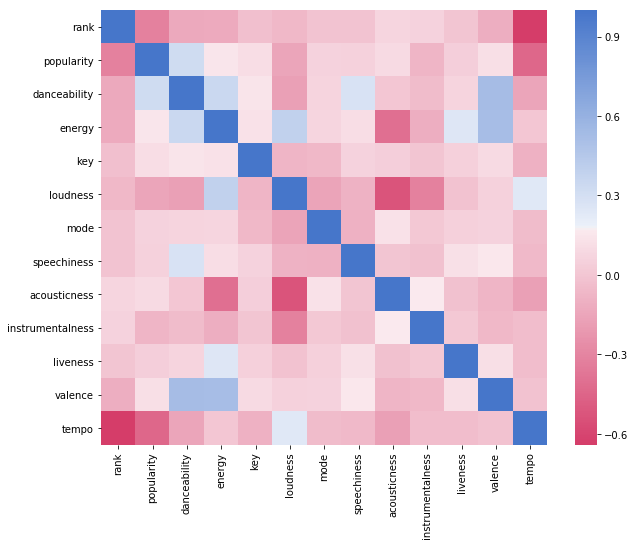

In [107]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
sns.heatmap(data_zs.corr(), cmap=cmap)

                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     5092.
Date:                Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:14:09   Log-Likelihood:                 3596.3
No. Observations:                7281   AIC:                            -7189.
Df Residuals:                    7279   BIC:                            -7175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4196      0.016     91.365      0.0

Text(0,0.5,'rank')

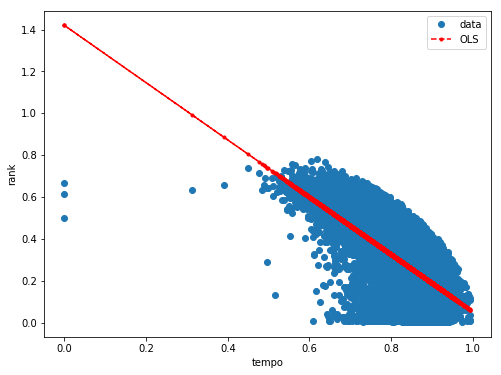

In [108]:
x = data_zs["tempo"]
X = sm.add_constant(x)
y = data_zs["rank"]
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
y_fitted =results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')
plt.xlabel("tempo")
plt.ylabel("rank")

In [109]:
x = data_zs[["tempo","popularity"]]
X = sm.add_constant(x)
y = data_zs["rank"]
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 2.166e+04
Date:                Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:14:09   Log-Likelihood:                 8724.9
No. Observations:                7281   AIC:                        -1.744e+04
Df Residuals:                    7278   BIC:                        -1.742e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4899      0.010    237.460      0.000       2.469       2.510
tempo         -2.0630      0.011   -195.693      0.000      -2.084      -2.042
popularity    -1.1847      0.008   -149.984      0.000      -1.200      -1.169
==============================================================================
Omnibus:                     3578.309   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60757.868
Skew:                          -1.939   Prob(JB):                         0.00
Kurtosis:                      16.610   Cond. No.                         24.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
x = data_zs[["tempo","danceability","loudness","energy","valence","popularity"]]
X = sm.add_constant(x)
y = data_zs["rank"]
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     7571.
Date:                Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:14:09   Log-Likelihood:                 8874.9
No. Observations:                7281   AIC:                        -1.774e+04
Df Residuals:                    7274   BIC:                        -1.769e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.5607      0.011    229.054      0.000       2.539       2.583
tempo           -2.0902      0.011   -198.400      0.000      -2.111      -2.070
danceability    -1.7947      0.807     -2.223      0.026      -3.377      -0.212
loudness         0.6327      0.044     14.516      0.000       0.547       0.718
energy          -3.8761      0.761     -5.096      0.000      -5.367      -2.385
valence         -1.7193      0.628     -2.738      0.006      -2.950      -0.488
popularity      -1.1588      0.008   -142.129      0.000      -1.175      -1.143
==============================================================================
Omnibus:                     3473.189   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61502.895
Skew:                          -1.849   Prob(JB):                         0.00
Kurtosis:                      16.750   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
X = data_zs[["tempo","danceability","loudness","energy","valence","popularity"]]
y = data_zs["rank"]
X=np.array(X)
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
clf = LinearRegression()
scores = cross_val_score(clf, X_test, y_test, cv=6)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.86583208  0.8913719   0.8723641   0.89124879  0.76874914  0.87436379]
Accuracy: 0.86 (+/- 0.08)


In [112]:
aa= data_hit.copy()
aa.head()

rank  popularity  danceability    energy       key  loudness      mode  \
0  0.007882    0.788175      0.005935  0.003578  0.055172 -0.074782  0.007882   
1  0.007342    0.712197      0.004398  0.003289  0.058738 -0.046344  0.007342   
2  0.020845    0.680932      0.004892  0.005969  0.034741 -0.033887  0.000000   
3  0.006958    0.681933      0.005323  0.003639  0.013917 -0.030151  0.006958   
4  0.005668    0.419431      0.003764  0.003316  0.039676 -0.034172  0.000000   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
0     0.000759      0.000192      4.429541e-07  0.003925  0.002711  0.608234   
1     0.000170      0.001197      0.000000e+00  0.000778  0.001233  0.697880   
2     0.000692      0.000129      0.000000e+00  0.000149  0.006434  0.730370   
3     0.000209      0.001280      2.477226e-07  0.000919  0.002742  0.730559   
4     0.000873      0.001071      0.000000e+00  0.000748  0.001128  0.906242   

   hit  
0  Yes  
1  Yes  
2  Yes  
3  Yes  
4  Yes

In [113]:
aa.hit.replace(('Yes', 'No'), (1, 0), inplace=True)

In [114]:
aa['hit'].value_counts()

1    3750
0    3531
Name: hit, dtype: int64

In [115]:
data_hit.groupby('hit').mean()

rank  popularity  danceability    energy       key  loudness  \
hit                                                                     
No   0.482997    0.386893      0.004030  0.004298  0.034119 -0.043381   
Yes  0.162229    0.466798      0.004669  0.004904  0.038051 -0.045848   

         mode  speechiness  acousticness  instrumentalness  liveness  \
hit                                                                    
No   0.004354     0.000664      0.001365          0.000163  0.001203   
Yes  0.004967     0.000725      0.001330          0.000106  0.001321   

      valence     tempo  
hit                      
No   0.003206  0.763128  
Yes  0.003791  0.848441

## Feature Selection

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [116]:
logreg = LogisticRegression()
rfe = RFE(logreg, 7)
X = ['popularity','danceability','energy','key','loudness','mode','speechiness','acousticness'
,'instrumentalness','liveness','valence','tempo']
y = ['hit']
rfe = rfe.fit(data_hit[X], data_hit[y] )
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True  True False False False False  True  True]
[1 1 2 1 1 1 5 4 6 3 1 1]


G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
#pred=["popularity","key","loudness","mode","tempo",]
pred = ['popularity','danceability','energy','key','loudness','mode','speechiness','acousticness'
,'instrumentalness','liveness','valence','tempo']
L_model =sm.Logit(aa['hit'],aa[pred]).fit()
L_model.summary()

Optimization terminated successfully.
         Current function value: 0.674095
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    hit   No. Observations:                 7281
Model:                          Logit   Df Residuals:                     7269
Method:                           MLE   Df Model:                           11
Date:                Sat, 10 Mar 2018   Pseudo R-squ.:                 0.02685
Time:                        23:14:10   Log-Likelihood:                -4908.1
converged:                       True   LL-Null:                       -5043.5
                                        LLR p-value:                 1.186e-51
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
popularity           2.4523      0.212     11.564      0.000       2.037       2.868
danceability        33.4572     23.892      1.400      0.161     -13.370      80.284
energy            -137.1976     23.527     -5.832      0.000    -183.309     -91.086
key                 -0.5795      0.944     -0.614      0.539      -2.429       1.270
loudness             8.3407      1.466      5.691      0.000       5.468      11.213
mode                14.5880      7.327      1.991      0.046       0.227      28.949
speechiness        -47.1124     34.367     -1.371      0.170    -114.471      20.247
acousticness       -72.0374     17.295     -4.165      0.000    -105.935     -38.140
instrumentalness   -14.4690     34.516     -0.419      0.675     -82.118      53.180
liveness            -7.3498     24.710     -0.297      0.766     -55.780      41.081
valence             78.9458     18.093      4.363      0.000      43.485     114.407
tempo               -0.2415      0.122     -1.985      0.047      -0.480      -0.003
====================================================================================
"""

In [118]:
pred = ['popularity', 'energy', 'loudness', 'mode', 'acousticness', 'valence', 'tempo']
L_model =sm.Logit(aa['hit'],aa[pred]).fit()
L_model.summary()

Optimization terminated successfully.
         Current function value: 0.674366
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    hit   No. Observations:                 7281
Model:                          Logit   Df Residuals:                     7274
Method:                           MLE   Df Model:                            6
Date:                Sat, 10 Mar 2018   Pseudo R-squ.:                 0.02646
Time:                        23:14:10   Log-Likelihood:                -4910.1
converged:                       True   LL-Null:                       -5043.5
                                        LLR p-value:                 9.941e-55
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
popularity       2.5399      0.200     12.682      0.000       2.147       2.932
energy        -139.0847     21.873     -6.359      0.000    -181.955     -96.215
loudness         8.2986      1.319      6.291      0.000       5.713      10.884
mode            16.3095      7.208      2.263      0.024       2.183      30.437
acousticness   -74.3222     17.212     -4.318      0.000    -108.057     -40.587
valence         88.0906     16.505      5.337      0.000      55.742     120.439
tempo           -0.2252      0.121     -1.869      0.062      -0.461       0.011
================================================================================
"""

##  Cross-validate the model

In [119]:
X = aa[['popularity', 'energy', 'loudness', 'mode', 'acousticness', 'valence', 'tempo']]
y = aa["hit"]
X=np.array(X)
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf = LogisticRegression()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.89497717  0.91780822  0.90410959  0.87671233  0.89041096  0.92694064
  0.9086758   0.89908257  0.87096774  0.89400922]
Accuracy: 0.90 (+/- 0.03)


## Confusion Matrix

In [120]:
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[ 945  162]
 [  47 1031]]


In [ ]:
The result is telling us that we have 945+1031 correct predictions and 47+162 incorrect predictions.

## Compute precision, recall, F-measure and support
To quote from Scikit Learn:
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.85      0.90      1107
          1       0.86      0.96      0.91      1078

avg / total       0.91      0.90      0.90      2185



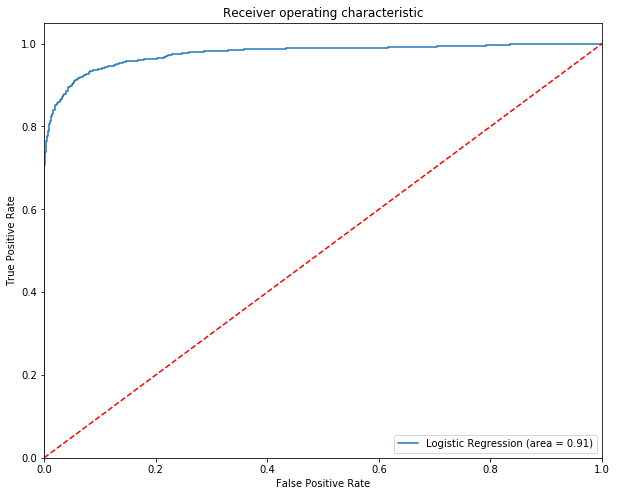

In [124]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()